In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NW_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,0.0,NaN,2.0,...,0.0,NaN,0.0,0,0.0,0.0,0.0,0.0,2.0,0.0
1,NaN,1.0,2.0,0.0,0.0,0.0,3.0,0.0,3.0,0.0,...,0.0,NaN,0.0,0,0.0,2.0,2.0,2.0,0.0,7.0
2,2.0,2.0,1.0,0.0,0.0,NaN,3.0,0.0,2.0,0.0,...,0.0,NaN,NaN,2,0.0,3.0,3.0,2.0,0.0,7.0
3,2.0,2.0,2.0,1.0,0.0,0.0,2.0,0.0,2.0,2.0,...,0.0,0.0,0.0,2,NaN,2.0,2.0,2.0,NaN,7.0
4,2.0,NaN,1.0,0.0,NaN,NaN,2.0,0.0,2.0,0.0,...,0.0,0.0,0.0,3,0.0,2.0,2.0,2.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.0,NaN,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,...,NaN,0.0,0.0,3,0.0,0.0,NaN,3.0,0.0,70.0
354,2.0,NaN,2.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,0.0,0.0,0.0,0,NaN,0.0,0.0,1.0,0.0,NaN
355,2.0,2.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,NaN,0.0,2,0.0,0.0,NaN,2.0,NaN,70.0
356,2.0,NaN,NaN,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0.0,0,0.0,0.0,NaN,NaN,0.0,70.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	70
float64		column 2	71
float64		column 3	70
float64		column 4	70
float64		column 5	36
float64		column 6	141
float64		column 7	70
float64		column 8	35
float64		column 9	106
float64		column 10	36
float64		column 11	106
float64		column 12	70
float64		column 13	35
float64		column 14	35
float64		column 15	71
float64		column 16	106
float64		column 17	71
float64		column 18	141
float64		column 19	35
int64		column 20	0
float64		column 21	106
float64		column 22	70
float64		column 23	71
float64		column 24	70
float64		column 25	71
float64		column 26	106
float64		column 27	70
int64		column 28	0
float64		column 29	106
float64		column 30	70
float64		column 31	35
float64		column 32	106
float64		column 33	70
float64		column 34	71


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,288.000000,287.000000,288.000000,288.000000,322.000000,217.000000,288.000000,323.000000,252.000000,322.000000,...,287.000000,252.000000,288.000000,358.000000,252.000000,288.000000,323.000000,252.000000,288.000000,287.000000
mean,2.065972,1.811847,1.576389,1.371528,0.586957,0.345622,0.166667,0.383901,0.420635,0.478261,...,0.271777,0.396825,0.409722,0.949721,0.349206,0.086806,0.117647,1.904762,0.489583,36.404181
std,0.595414,0.636423,0.856049,1.080790,0.868388,0.852769,0.584349,0.842203,0.811797,0.861694,...,0.716444,0.814014,0.913798,1.129060,0.849818,0.403943,0.503187,0.661142,1.052571,14.720842
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,27.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.000000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,47.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,70.000000


<AxesSubplot:>

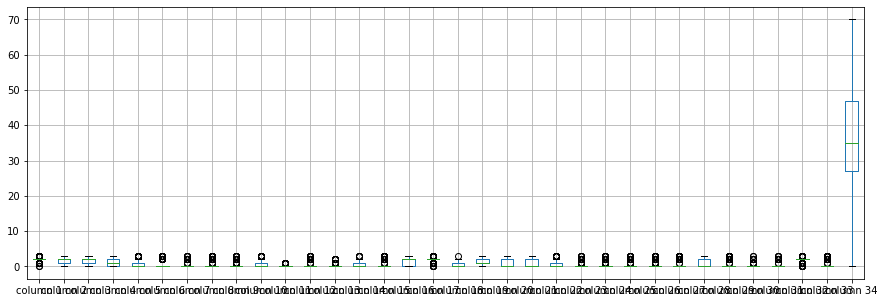

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.065972
column 2      1.811847
column 3      1.576389
column 4      1.371528
column 5      0.586957
column 6      0.345622
column 7      0.166667
column 8      0.383901
column 9      0.420635
column 10     0.478261
column 11     0.115079
column 12     0.340278
column 13     0.142415
column 14     0.510836
column 15     0.240418
column 16     1.357143
column 17     1.975610
column 18     0.437788
column 19     1.291022
column 20     0.662011
column 21     0.932540
column 22     0.503472
column 23     0.261324
column 24     0.333333
column 25     0.271777
column 26     0.396825
column 27     0.409722
column 28     0.949721
column 29     0.349206
column 30     0.086806
column 31     0.117647
column 32     1.904762
column 33     0.489583
column 34    36.404181
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.376392,0.243225,0.006890,-0.057421,0.053645,-0.112918,-0.028952,0.195952,0.157012,...,0.029290,0.130740,0.055296,0.030725,-0.054957,-0.022968,0.014028,0.080187,-0.009631,-0.091117
column 2,0.376392,1.000000,0.317979,-0.120048,-0.057103,-0.134690,-0.077907,-0.071151,0.139380,0.301026,...,-0.131174,0.165782,-0.084695,0.004197,-0.101640,-0.050133,-0.012777,0.027879,-0.151137,-0.003861
column 3,0.243225,0.317979,1.000000,-0.058112,0.176299,0.175732,-0.089969,0.267955,0.220597,0.224940,...,0.258726,0.317491,0.322715,-0.248488,0.165501,-0.071898,-0.089700,0.070746,0.264071,0.101149
column 4,0.006890,-0.120048,-0.058112,1.000000,0.126023,0.350169,-0.145585,0.341174,-0.296601,-0.211734,...,0.225690,-0.202441,0.347552,0.020661,0.299018,-0.177945,-0.149773,-0.020560,0.347162,0.103800
column 5,-0.057421,-0.057103,0.176299,0.126023,1.000000,0.387579,-0.155562,0.387161,-0.127150,0.040983,...,0.307612,-0.022335,0.375444,0.033179,0.426521,-0.148856,-0.161806,0.104593,0.364847,0.115185
column 6,0.053645,-0.134690,0.175732,0.350169,0.387579,1.000000,-0.110725,0.829210,-0.251641,-0.234620,...,0.818478,-0.072284,0.907255,0.077834,0.930305,-0.081973,-0.100038,0.250414,0.917103,0.072172
column 7,-0.112918,-0.077907,-0.089969,-0.145585,-0.155562,-0.110725,1.000000,-0.137446,0.370789,-0.034546,...,-0.063772,-0.146072,-0.127774,-0.020841,-0.121743,0.811571,0.877474,-0.171255,-0.117113,-0.372664
column 8,-0.028952,-0.071151,0.267955,0.341174,0.387161,0.829210,-0.137446,1.000000,-0.277992,-0.264234,...,0.892767,-0.123959,0.885511,0.144066,0.900605,-0.103463,-0.110943,0.227152,0.874593,0.113532
column 9,0.195952,0.139380,0.220597,-0.296601,-0.127150,-0.251641,0.370789,-0.277992,1.000000,0.568007,...,-0.222452,0.344652,-0.244207,-0.337739,-0.251634,0.355357,0.379221,-0.011017,-0.224105,-0.159485
column 10,0.157012,0.301026,0.224940,-0.211734,0.040983,-0.234620,-0.034546,-0.264234,0.568007,1.000000,...,-0.238416,0.467754,-0.234748,-0.407719,-0.243003,-0.012322,-0.054388,0.010386,-0.233640,0.025047


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+89,34+89+89,34+89+89+89,34+89+89+89+89,34+89+89+89+89+89,34+89+89+89+89+89+89,34+89+89+89+89+89+89+89,34+89+89+89+89+89+89,34+89+89+89+89+89,34+89+89+89+89,34+89+89+89,34+89+89,34+89,34], vae_layer = False, seed = 89)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 59.36774028431285
Epoch: 1 , loss: 59.46549259532582
Epoch: 2 , loss: 58.9862192327326
Epoch: 3 , loss: 58.42101409218528
Epoch: 4 , loss: 57.46511563387784
Epoch: 5 , loss: 56.408029382879086
Epoch: 6 , loss: 55.19931411743164
Epoch: 7 , loss: 54.753221858631484
Epoch: 8 , loss: 54.58651560003107
Epoch: 9 , loss: 54.4046441858465
Epoch: 10 , loss: 53.70648696205833
Epoch: 11 , loss: 53.57430232654918
Epoch: 12 , loss: 53.13469904119318
Epoch: 13 , loss: 52.45261625810103
Epoch: 14 , loss: 52.3231235850941
Epoch: 15 , loss: 52.349085721102625
Epoch: 16 , loss: 51.919091484763406
Epoch: 17 , loss: 51.876896944913
Epoch: 18 , loss: 51.717653101140804
Epoch: 19 , loss: 51.21301963112571
Epoch: 20 , loss: 51.20079716769132
Epoch: 21 , loss: 50.986235011707656
Epoch: 22 , loss: 50.911795529452235
Epoch: 23 , loss: 50.58504156632857
Epoch: 24 , loss: 50.469296021894976
Epoch: 25 , loss: 49.67388985373757
Epo

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      2.271646
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     0.545869
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     1.000000
column 15     0.000000
column 16     1.547567
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.355997
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.676904
column 30     0.000000
column 31     1.000000
column 32     2.147346
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0.631183,0.000000,0.508766,0.0,0.00000,0.359710,0.244207,0.0,-1.411676,0.000000,...,0.000000,0.340781,0.000000,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
1,1.182762,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.662129,0.000000,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.0,0.00000,0.219642,0.000000,0.0,0.000000,0.000000,...,0.000000,0.423286,0.262894,0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0.416964,0.0,0.000000,0.000000,0.329454,0.000000
4,0.000000,-0.953091,0.000000,0.0,0.44509,0.210323,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0,0.000000,0.0,0.000000,0.000000,0.000000,13.092991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0.000000,1.147387,0.000000,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.561139,0.000000,0.000000,0,0.000000,0.0,0.232632,0.000000,0.000000,0.000000
354,0.000000,-1.861377,0.000000,0.0,0.00000,0.000000,0.000000,0.0,-2.804462,-1.776079,...,0.000000,0.000000,0.000000,0,0.353804,0.0,0.000000,0.000000,0.000000,-55.216292
355,0.000000,0.000000,0.536767,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.512292,0.000000,0,0.000000,0.0,0.182096,0.000000,0.512232,0.000000
356,0.000000,1.173976,1.973298,0.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.351859,0.424954,0.000000,0,0.000000,0.0,0.205087,1.011867,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(182.34201585659517, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.24053372522041028

In [18]:
new_df.iloc[66,:]

column 1      2.000000
column 2      0.000000
column 3      0.000000
column 4      3.000000
column 5      0.000000
column 6      0.000000
column 7      0.000000
column 8      0.178183
column 9      0.247626
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     2.000000
column 16     2.000000
column 17     2.000000
column 18     0.270969
column 19     0.000000
column 20     0.000000
column 21     3.000000
column 22     0.309377
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     2.000000
column 33     0.000000
column 34    12.553104
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1.631183,1.000000,1.508766,1.0,1.00000,0.359710,0.244207,0.0,0.588324,2.000000,...,0.000000,0.340781,0.000000,0,0.000000,0.0,0.000000,0.000000,2.000000,0.000000
1,2.182762,1.000000,2.000000,0.0,0.00000,0.000000,3.000000,0.0,3.000000,0.000000,...,0.000000,0.662129,0.000000,0,0.000000,2.0,2.000000,2.000000,0.000000,7.000000
2,2.000000,2.000000,1.000000,0.0,0.00000,0.219642,3.000000,0.0,2.000000,0.000000,...,0.000000,0.423286,0.262894,2,0.000000,3.0,3.000000,2.000000,0.000000,7.000000
3,2.000000,2.000000,2.000000,1.0,0.00000,0.000000,2.000000,0.0,2.000000,2.000000,...,0.000000,0.000000,0.000000,2,0.416964,2.0,2.000000,2.000000,0.329454,7.000000
4,2.000000,1.046909,1.000000,0.0,0.44509,0.210323,2.000000,0.0,2.000000,0.000000,...,0.000000,0.000000,0.000000,3,0.000000,2.0,2.000000,2.000000,0.000000,20.092991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2.000000,3.147387,0.000000,2.0,1.00000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.561139,0.000000,0.000000,3,0.000000,0.0,0.232632,3.000000,0.000000,70.000000
354,2.000000,1.138623,2.000000,0.0,0.00000,0.000000,0.000000,0.0,0.195538,0.223921,...,0.000000,0.000000,0.000000,0,0.353804,0.0,0.000000,1.000000,0.000000,14.783708
355,2.000000,2.000000,2.536767,1.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.512292,0.000000,2,0.000000,0.0,0.182096,2.000000,0.512232,70.000000
356,2.000000,2.173976,1.973298,3.0,0.00000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.351859,0.424954,0.000000,0,0.000000,0.0,0.205087,2.011867,0.000000,70.000000


In [21]:
imputations[-1].to_excel("DERM_NW_20(imp).xlsx", index=False, header=False)